In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
np.multiply(np.arange(3).reshape(3,1),np.matrix(np.arange(3).reshape(3,1)))

matrix([[0],
        [1],
        [4]])

In [28]:
t = np.sign(np.matrix(np.arange(18).reshape(6,3)))
t[t==1] = -5
t

matrix([[ 0, -5, -5],
        [-5, -5, -5],
        [-5, -5, -5],
        [-5, -5, -5],
        [-5, -5, -5],
        [-5, -5, -5]])

In [21]:
np.matrix(np.arange(18).reshape(6,3)) @ np.matrix(np.arange(3).reshape(3,1)) #np.matrix(np.arange(18).reshape(6,3))

matrix([[ 5],
        [14],
        [23],
        [32],
        [41],
        [50]])

In [90]:
seed = 48763
rng = np.random.default_rng(seed=seed)

In [88]:
mean_pos = [3,2]
cov_pos = [
    [0.4,0],
    [0,0.4]
]
mean_neg = [5,0]
cov_neg = [
    [0.6,0],
    [0,0.6]
]

In [29]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [91]:
N = 256
y_label = rng.integers(low=0,high=2,size=N)
y_label[y_label==0] = -1

In [92]:
temp = []
for y in y_label:
    if y == 1:
        temp.append(rng.multivariate_normal(mean=mean_pos,cov=cov_pos,size=1))
    else:
        temp.append(rng.multivariate_normal(mean=mean_neg,cov=cov_neg,size=1))

In [93]:
len(temp)

256

In [96]:
x_train = np.concatenate(temp,axis=0)
x_train = np.column_stack((np.ones(N),x_train))
x_train[:10]
# x_train[:10]

array([[ 1.        ,  5.61255284,  1.06457292],
       [ 1.        ,  3.16392785,  1.7421029 ],
       [ 1.        ,  5.6515327 ,  0.35241094],
       [ 1.        ,  5.26935008, -0.31502533],
       [ 1.        ,  4.94180659,  0.00968247],
       [ 1.        ,  3.74727673,  1.63220603],
       [ 1.        ,  4.91796401, -0.51272687],
       [ 1.        ,  2.71216696,  3.12867876],
       [ 1.        ,  6.33484686,  1.15694625],
       [ 1.        ,  4.93284377,  1.26162994]])

In [31]:
import numpy as np
import matplotlib.pyplot as plt

rawdata = np.loadtxt("exp_result.txt",skiprows=1)

In [40]:
rawdata = np.loadtxt("exp_result.txt",skiprows=1)
Q9data,Q10data,Q11Adata,Q11Bdata,Q12Adata,Q12Bdata = np.split(rawdata,indices_or_sections=6,axis=1)

In [73]:
start = int(Q10data.min() * 100 / 5) * 5 / 100
stop = (int(Q10data.max() * 100 / 5) + 1) * 5 / 100
np.arange(start=start,stop=stop,step=0.01)
# Q10data.max()

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [235]:
# 抓取資料點
import myfunc
from myfunc import TRAIN_SIZE,OUTLIER_SIZE,TEST_SIZE,ITERATION,ETA
for i in range(128):
    seed = i
    y_train_label, x_train_data = myfunc.specialProcess(TRAIN_SIZE,random_seed=seed)
    y_outlier_label, x_outlier_data = myfunc.outlierProcess(OUTLIER_SIZE,random_seed=seed)
    y_test_label, x_test_data = myfunc.specialProcess(TEST_SIZE,random_seed=seed)

    y_outlier_label = np.concatenate((y_train_label,y_outlier_label),axis=0)
    x_outlier_data = np.concatenate((x_train_data,x_outlier_data),axis=0)
    # LOGREG
    w_LOGREG = myfunc.logisticRegression(x_train_data,y_train_label,ITERATION,ETA)
    Zero_One_LOGREG_out = myfunc.zeroOneError(w_LOGREG,x_test_data,y_test_label) # Q11
    if Zero_One_LOGREG_out > 0.05:
        print(i)
        break

22


In [242]:
Zero_One_LOGREG_out

0.06005859375

In [252]:
np.savetxt("x_train_data2",x_train_data)
np.savetxt("x_test_data2",x_test_data)
np.savetxt("y_train_label2",y_train_label)
np.savetxt("y_test_label2",y_test_label)

In [237]:
w_LIN = myfunc.linearRegression(x_train_data,y_train_label)
Zero_One_LIN_out = myfunc.zeroOneError(w_LIN,x_test_data,y_test_label) # Q11
Zero_One_LIN_out

0.022216796875

In [228]:
w_LOGREG = myfunc.logisticRegression(x_train_data,y_train_label,ITERATION*10,ETA)
Zero_One_LOGREG_out = myfunc.zeroOneError(w_LOGREG,x_test_data,y_test_label) # Q11
w_LOGREG

matrix([[ 48.9502611 ],
        [-15.89041548],
        [ 16.0772244 ]])

In [229]:
Zero_One_LOGREG_out

0.02294921875

In [243]:
# plt.scatter(Q12Adata,Q12Bdata)
# plt.ylim(0.01,0.05)
# plt.xlim(0.01,0.05)
# plt.xticks(np.arange(0.017,0.03,0.002))
# plt.yticks(np.arange(0.017,0.03,0.002))
# plt.grid()
def getabc(weight):
    weight = np.ravel(weight)
    # "-23.5x+48.36y+41.12=0"
    # "y=23.5/48.36x-41.12/48.36"
    a = weight[1]
    b = weight[2]
    c = weight[0]
    "ax+by+c=0=>y=-a/bx-c/b"
    return (a,b,c)
w_LIN,w_LOGREG

(matrix([[ 1.31619835],
         [-0.43138877],
         [ 0.37294267]]),
 matrix([[ 36.82785176],
         [-15.91419475],
         [ 13.51948818]]))

[]

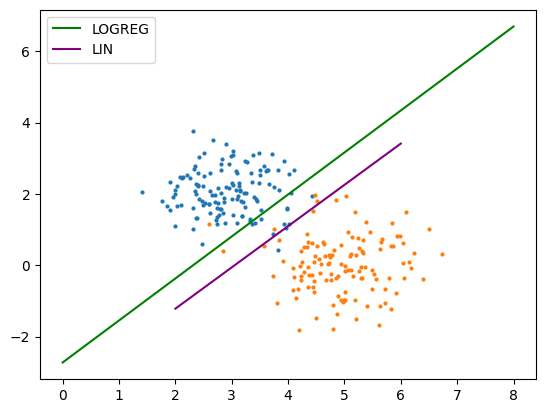

In [251]:
thex = x_train_data
they = y_train_label
maskpos = np.ravel(they==1)
maskneg = np.ravel(they==-1)
plt.scatter(np.ravel(thex[maskpos][:,1]),np.ravel(thex[maskpos][:,2]),s=4)
plt.scatter(np.ravel(thex[maskneg][:,1]),np.ravel(thex[maskneg][:,2]),s=4)


x = np.linspace(0, 8, 100)
a,b,c = getabc(w_LOGREG)
y = -1 * a/b * x + -1 * c/b
plt.plot(x,y,color="green",label="LOGREG")
x = np.linspace(0, 8, 100)
a,b,c = getabc(w_LIN)
y = -1 * a/b * x + -1 * c/b
plt.plot(x,y,color="purple",label="LIN")
plt.legend()
plt.plot()

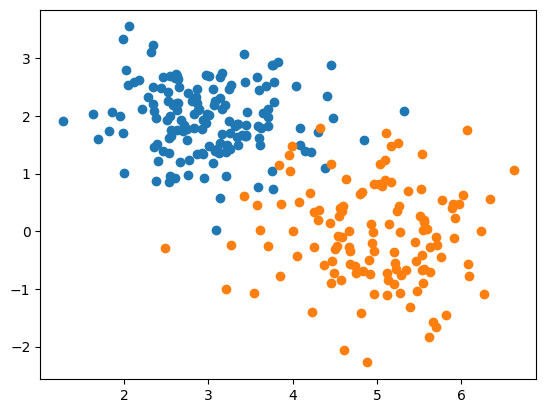

In [209]:
plt.scatter(np.ravel(x_train_data[maskpos][:,1]),np.ravel(x_outlier_data[maskpos][:,2]))
plt.scatter(np.ravel(x_outlier_data[maskneg][:,1]),np.ravel(x_outlier_data[maskneg][:,2]))

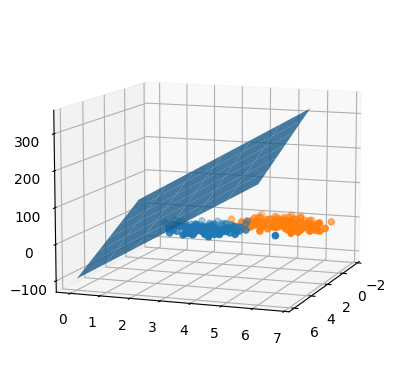

In [154]:
# create the figure
fig = plt.figure()

# add axes
# plt.figure(figsize=(19.2,10.8))
ax = fig.add_subplot(111,projection='3d')

xx, yy = np.meshgrid(range(7), range(7))

z = -23.5 * xx + 48.336 * yy + 41.12

# plot the plane
ax.plot_surface(xx, yy, z, alpha=)

maskpos = np.ravel(y_label==1)
maskneg = np.ravel(y_label==-1)

ax.scatter3D(,x_train[maskpos][:,0])
ax.scatter3D(x_train[maskneg][:,1],x_train[maskneg][:,2],x_train[maskneg][:,0])
ax.view_init(10, 20)
plt.show()